In [27]:
### Kütüphaneler ###
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_auc_score

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


## 1. Veri Seti Yükleme

In [28]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

## 2. Veri Ön İşleme

In [29]:
# Veri seti boyutlarını kontrol etme
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [30]:
import random
# Veri seti büyük olduğu için makine öğreninimi model fit etme süresi ve hiperparametre optimizasyonu çok zaman alıyor o yüzden train için 1000,
# test için 250 satır tercih ettim.

random.seed(46)
sampled_indices_train = random.sample(range(len(X_train)), 1000)
sampled_indices_test = random.sample(range(len(X_test)), 250)

X_train = X_train[sampled_indices_train]
y_train = y_train[sampled_indices_train]

X_test = X_test[sampled_indices_test]
y_test = y_test[sampled_indices_test]

In [31]:
# Sample sonrası veri seti boyutlarını kontrol etme
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1000, 28, 28)
y_train shape: (1000,)
X_test shape: (250, 28, 28)
y_test shape: (250,)


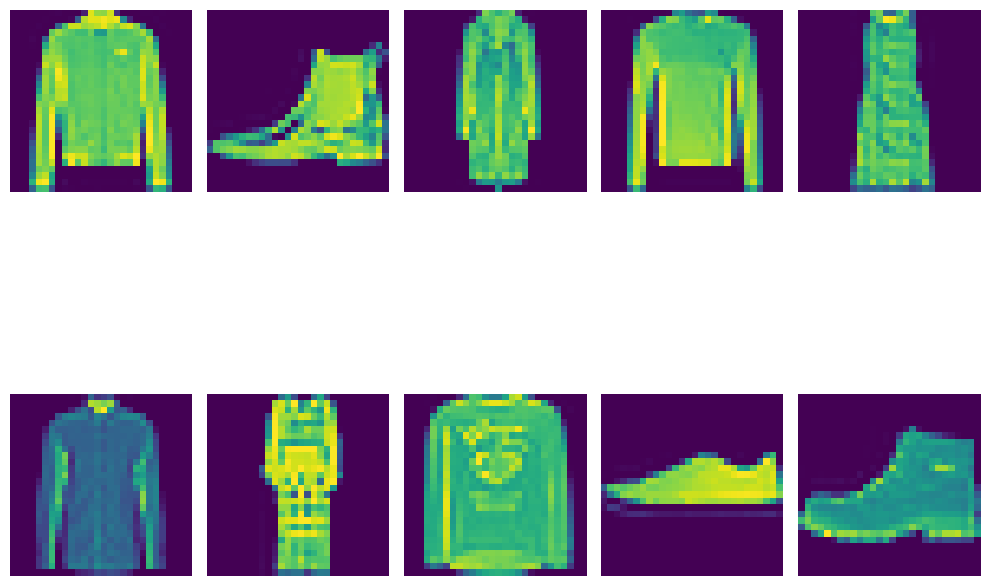

In [33]:
# Veri setindeki birkaç örneği görselleştirme (ilk 10 görüntüyü görselleştirme)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [34]:
# Verileri normalize etme (0-1 aralığına getirme-Normalleştirme)
X_train = X_train / 255.0
X_test = X_test / 255.0

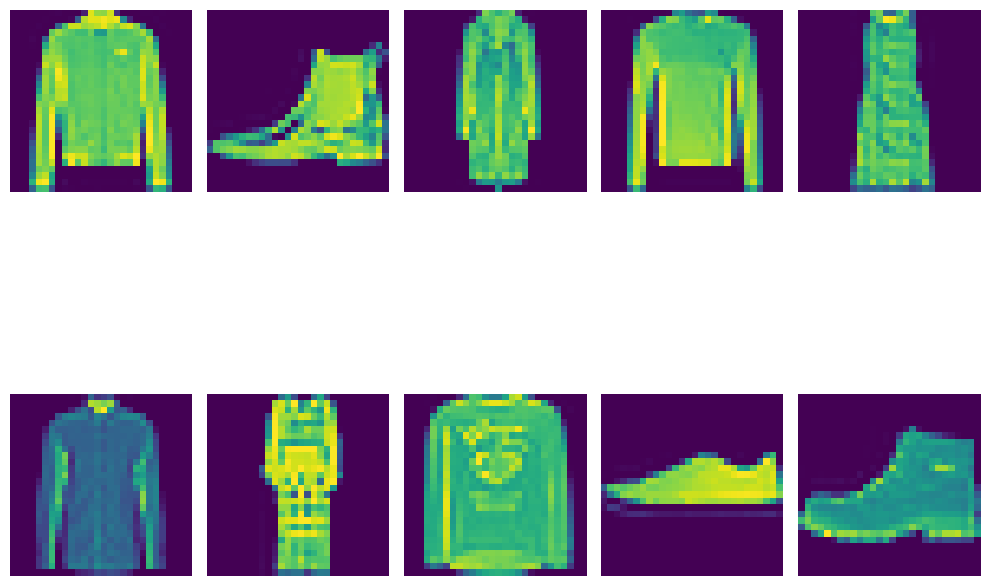

In [35]:
# Normalize edilmiş görüntüleri görselleştirme
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Makine Öğrenmesi Modeli Oluşturma

In [ ]:
# Verileri düzleştirme (28x28 boyutundan 1D vektöre dönüştürme)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [ ]:
X_train.shape

(1000, 784)

In [ ]:
# Modelleri oluşturma
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVM', SVC()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier(objective='reg:squarederror')),
          ("LightGBM", LGBMClassifier(verbosity=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False))]

Model: LR
Accuracy: 0.8080
Precision: 0.8067
Recall: 0.8080
F1-score: 0.8068
AUC: 0.9784
Confusion Matrix:


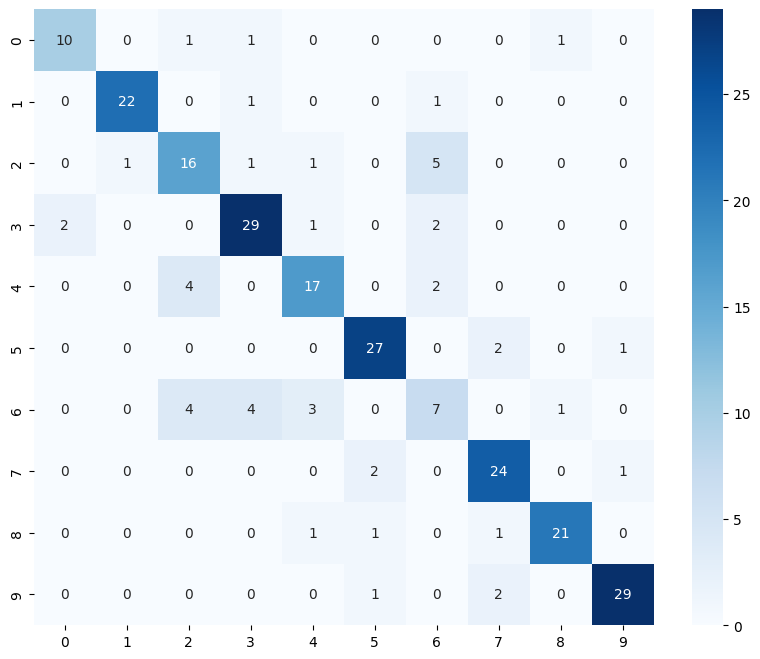

Model: KNN
Accuracy: 0.8080
Precision: 0.8332
Recall: 0.8080
F1-score: 0.8145
AUC: 0.9572
Confusion Matrix:


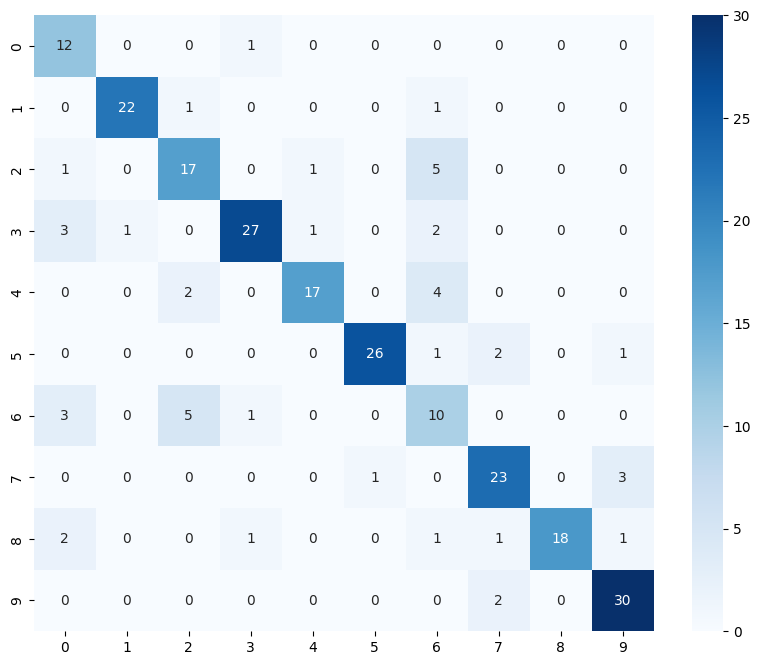

Model: CART
Accuracy: 0.6680
Precision: 0.6849
Recall: 0.6680
F1-score: 0.6692
AUC: 0.8110
Confusion Matrix:


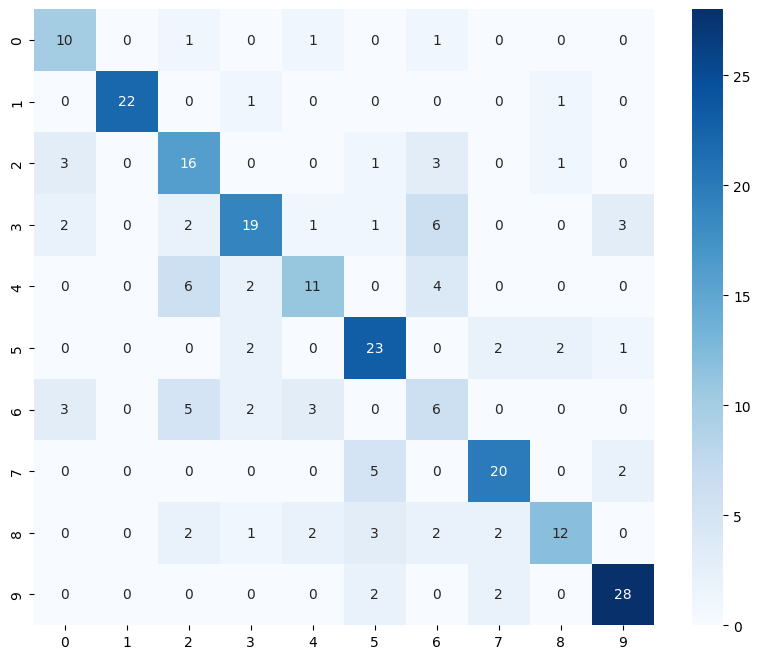

Model: RF
Accuracy: 0.8080
Precision: 0.7988
Recall: 0.8080
F1-score: 0.7990
AUC: 0.9836
Confusion Matrix:


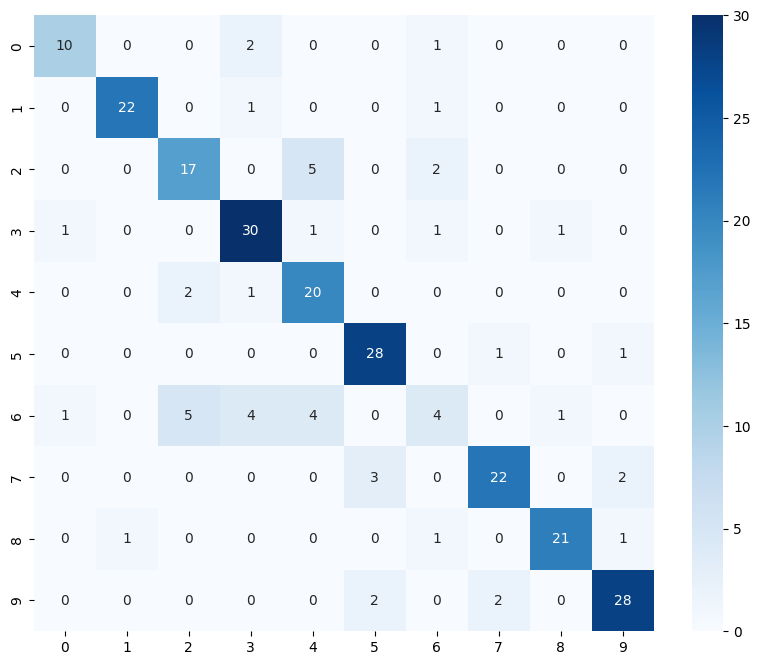

Model: SVM
Accuracy: 0.7920
Precision: 0.8044
Recall: 0.7920
F1-score: 0.7958
AUC: 0.9703
Confusion Matrix:


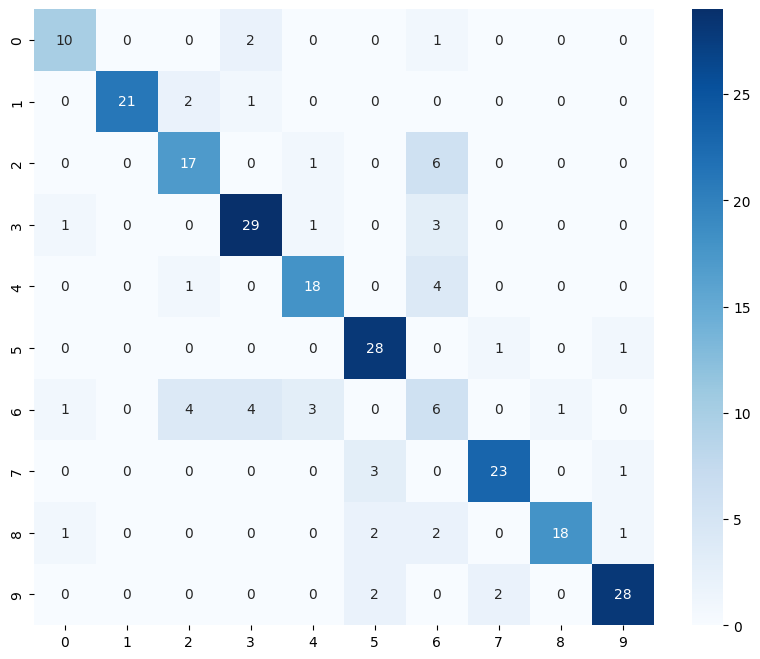

Model: GBM
Accuracy: 0.8120
Precision: 0.8057
Recall: 0.8120
F1-score: 0.8071
AUC: 0.9743
Confusion Matrix:


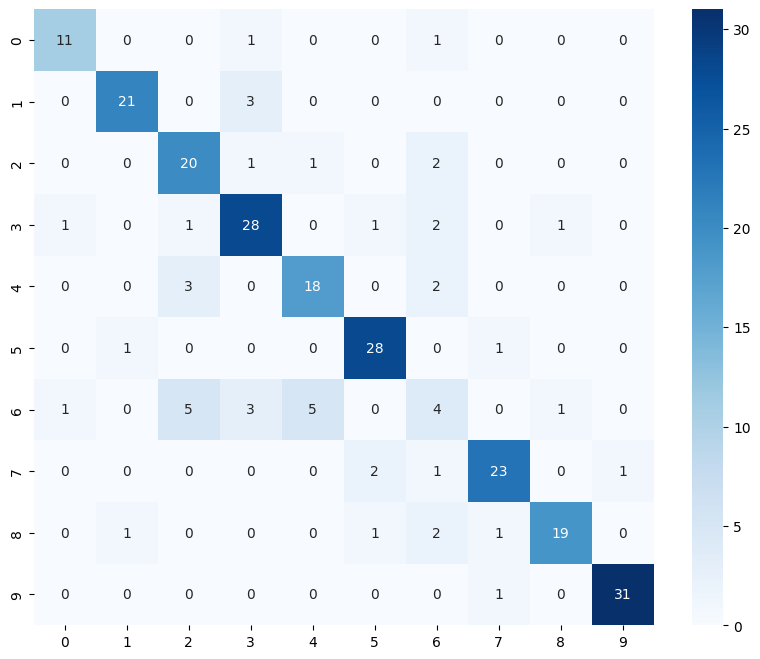

Model: XGBoost
Accuracy: 0.8360
Precision: 0.8326
Recall: 0.8360
F1-score: 0.8325
AUC: 0.9799
Confusion Matrix:


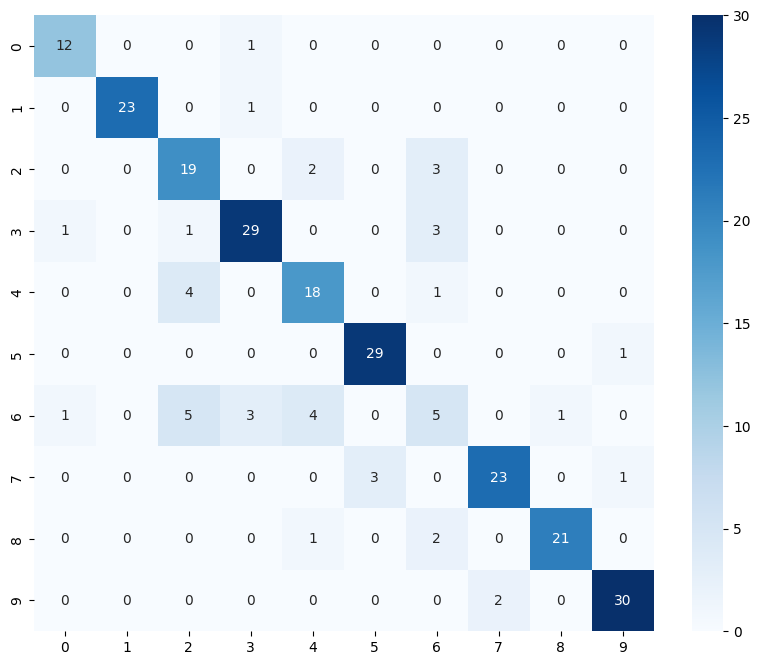

Model: LightGBM
Accuracy: 0.8480
Precision: 0.8464
Recall: 0.8480
F1-score: 0.8454
AUC: 0.9802
Confusion Matrix:


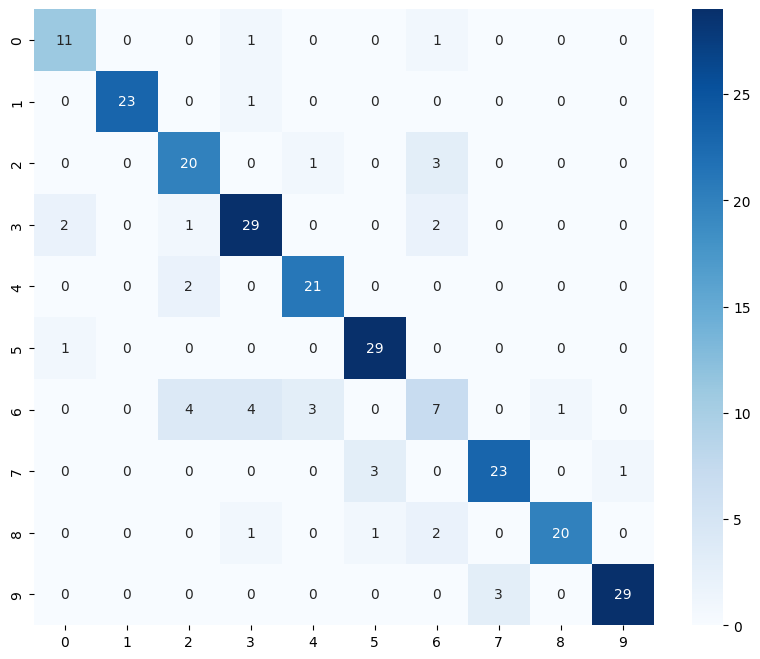

Model: CatBoost
Accuracy: 0.8280
Precision: 0.8232
Recall: 0.8280
F1-score: 0.8232
AUC: 0.9853
Confusion Matrix:


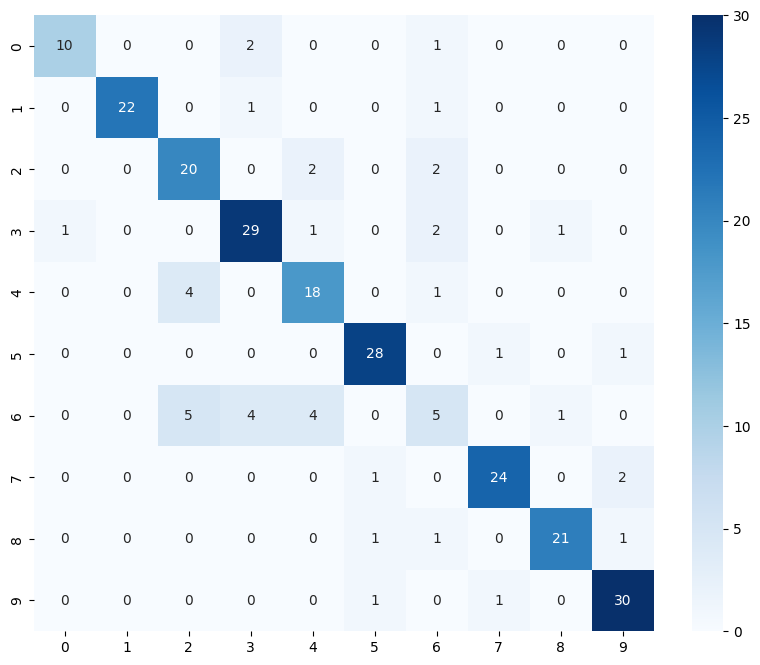

In [ ]:

# Her bir model için performansı değerlendirme
for name, model in models:
    # Modeli eğitme
    model.fit(X_train, y_train)

    # Tahminleri alıp metrikleri hesaplama
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    # AUC ve ROC eğrisi için özel durumlar
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_prob, average='macro', multi_class='ovr')
    else:  # SVC gibi bazı modellerde predict_proba metodu yoktur
        # Binarize
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

        # her sınıf için ROC AUC hesaplama
        auc_scores = []
        for i in range(y_test_bin.shape[1]):
            y_scores_class = model.decision_function(X_test)[:, i]
            auc = roc_auc_score(y_test_bin[:, i], y_scores_class)
            auc_scores.append(auc)

        # ortalama ROC AUC hesaplama
        average_auc = np.mean(auc_scores)
        auc = average_auc


    # Sonuçları yazdırma
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.show()

    print("="*90)




## 4. Hiperparametre Optimizasyonu

In [ ]:
### Random Forest ###
# Random Forest modelini oluşturma
rf = RandomForestClassifier(random_state=46)

# Hiperparametre ızgarasını tanımlama
rf_params = {"max_depth": [5, None],
             "max_features": [5, "auto"],
             "min_samples_split": [2, 5],
             "n_estimators": [ 400, 500,600]}

# Grid Search ile en iyi hiperparametreleri bulma
rf_best_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
rf_final = rf.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_train, y_train)

In [ ]:
y_rf_pred = rf_final.predict(X_test)

accuracy = accuracy_score(y_test, y_rf_pred)
precision = precision_score(y_test, y_rf_pred, average='weighted')
recall = recall_score(y_test, y_rf_pred, average='weighted')
f1 = f1_score(y_test, y_rf_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.8120
Precision: 0.8078
Recall: 0.8120
F1-score: 0.8080


In [ ]:
### LightGBM ###
lgbm_model = LGBMClassifier(random_state=17,verbosity=-1)

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
lgbm_best_grid.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'n_estimators': 500}

In [ ]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X_train, y_train)

In [ ]:
y_lgbm_pred = lgbm_final.predict(X_test)

accuracy = accuracy_score(y_test, y_lgbm_pred)
precision = precision_score(y_test, y_lgbm_pred, average='weighted')
recall = recall_score(y_test, y_lgbm_pred, average='weighted')
f1 = f1_score(y_test, y_lgbm_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8520
Precision: 0.8497
Recall: 0.8520
F1-score: 0.8478


In [ ]:
### XGBoost ###
xgboost_model = XGBClassifier(random_state=17)

xgboost_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [None, 5],
    'n_estimators': [500,1000]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
xgboost_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 1000}

In [ ]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X_train, y_train)

In [ ]:
y_xgboost_pred = xgboost_final.predict(X_test)

accuracy = accuracy_score(y_test, y_xgboost_pred)
precision = precision_score(y_test, y_xgboost_pred, average='weighted')
recall = recall_score(y_test, y_xgboost_pred, average='weighted')
f1 = f1_score(y_test, y_xgboost_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8400
Precision: 0.8377
Recall: 0.8400
F1-score: 0.8351


## 5. Yapay Sinir Ağları ile Model Eğitimi

In [2]:
# Veri setini yükle
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
# Sampling
import random

random.seed(46)
sampled_indices_train = random.sample(range(len(X_train)), 1000)
sampled_indices_test = random.sample(range(len(X_test)), 250)

X_train = X_train[sampled_indices_train]
y_train = y_train[sampled_indices_train]

X_test = X_test[sampled_indices_test]
y_test = y_test[sampled_indices_test]

In [4]:
# Veri Normalleştirme
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
# Classlar için one hot encoding işlemi yapalım
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
# Modelin tanımlanması
model = tf.keras.Sequential([

    # İlk katman: Flatten
    # Bu katman, 28x28 piksel boyutundaki 2D görüntüleri 1D vektörlere dönüştürür (784 uzunluğunda).
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # İkinci katman: Dense (Tam Bağlantılı Katman)
    # Bu katman, 4 nörona sahip ve ReLU aktivasyon fonksiyonunu kullanır.
    # ReLU, negatif değerleri sıfıra çevirir ve pozitif değerleri aynen geçer.
    tf.keras.layers.Dense(4, activation='relu'),

    # Üçüncü katman: Dense (Tam Bağlantılı Katman)
    # Bu katman, 8 nörona sahip ve ReLU aktivasyon fonksiyonunu kullanır.
    tf.keras.layers.Dense(8, activation='relu'),

    # Dördüncü katman: Dense (Çıkış Katmanı)
    # Bu katman, 10 nörona sahip ve softmax aktivasyon fonksiyonunu kullanır.
    # Softmax, çıktıların olasılık dağılımı olarak yorumlanmasını sağlar (10 sınıf için).
    tf.keras.layers.Dense(10, activation='softmax')
])

# Modelin özetini yazdırarak katmanların detaylarını görselleştirir.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 3140      
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 3270 (12.77 KB)
Trainable params: 3270 (12.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Modeli derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
# Modeli eğitme
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
32/32 [==============================] - 4s 57ms/step - loss: 2.1717 - accuracy: 0.2180 - val_loss: 2.0205 - val_accuracy: 0.3320
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 1.9080 - accuracy: 0.3710 - val_loss: 1.7634 - val_accuracy: 0.3880
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 1.7103 - accuracy: 0.3840 - val_loss: 1.6085 - val_accuracy: 0.3800
Epoch 4/10
32/32 [==============================] - 0s 10ms/step - loss: 1.5732 - accuracy: 0.4040 - val_loss: 1.4851 - val_accuracy: 0.4160
Epoch 5/10
32/32 [==============================] - 0s 12ms/step - loss: 1.4598 - accuracy: 0.4360 - val_loss: 1.3770 - val_accuracy: 0.4400
Epoch 6/10
32/32 [==============================] - 0s 10ms/step - loss: 1.3736 - accuracy: 0.4680 - val_loss: 1.2997 - val_accuracy: 0.4680
Epoch 7/10
32/32 [==============================] - 0s 12ms/step - loss: 1.3048 - accuracy: 0.5190 - val_loss: 1.2325 - val_accuracy: 0.5120
Epoch 8/10
32/3

In [11]:
# Test verisi üzerinde modelin performansını değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

8/8 - 0s - loss: 1.0991 - accuracy: 0.5560 - 164ms/epoch - 20ms/step
Test loss: 1.0991
Test accuracy: 0.5560


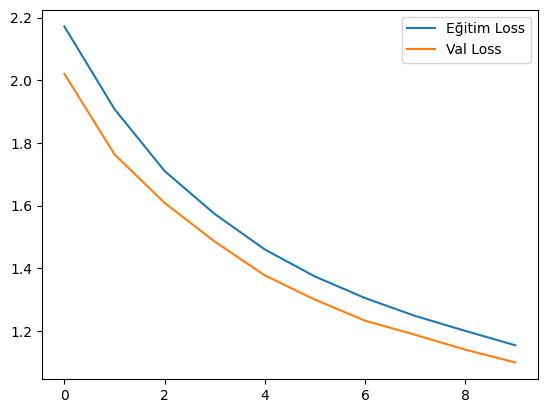

In [12]:
plt.figure()
# Eğitim kayıplarını çizme
plt.plot(hist.history["loss"], label="Eğitim Loss")
# Doğrulama kayıplarını çizme
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()


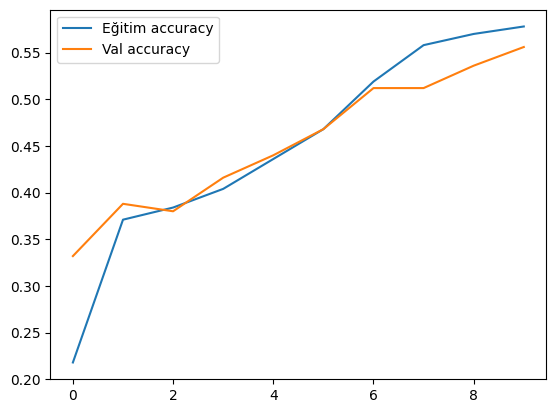

In [13]:
plt.figure()
# Eğitim doğruluğunu çizme
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
# Doğrulama doğruluğunu çizme
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [14]:
# Accuracy, precision, recall ve f1 score ölçme
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])

In [15]:
# Modeli eğitme
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
32/32 [==============================] - 4s 40ms/step - loss: 1.1171 - accuracy: 0.5950 - precision: 0.8872 - recall: 0.3540 - f1_score: 0.5592 - val_loss: 1.0791 - val_accuracy: 0.5560 - val_precision: 0.8529 - val_recall: 0.3480 - val_f1_score: 0.5153
Epoch 2/10
32/32 [==============================] - 0s 15ms/step - loss: 1.0804 - accuracy: 0.5990 - precision: 0.8784 - recall: 0.3830 - f1_score: 0.5678 - val_loss: 1.0571 - val_accuracy: 0.5680 - val_precision: 0.8704 - val_recall: 0.3760 - val_f1_score: 0.5314
Epoch 3/10
32/32 [==============================] - 0s 13ms/step - loss: 1.0478 - accuracy: 0.6290 - precision: 0.8846 - recall: 0.3910 - f1_score: 0.6046 - val_loss: 1.0215 - val_accuracy: 0.5960 - val_precision: 0.8679 - val_recall: 0.3680 - val_f1_score: 0.5710
Epoch 4/10
32/32 [==============================] - 1s 21ms/step - loss: 1.0169 - accuracy: 0.6320 - precision: 0.8974 - recall: 0.4110 - f1_score: 0.6110 - val_loss: 0.9928 - val_accuracy: 0.5920 - val_pr

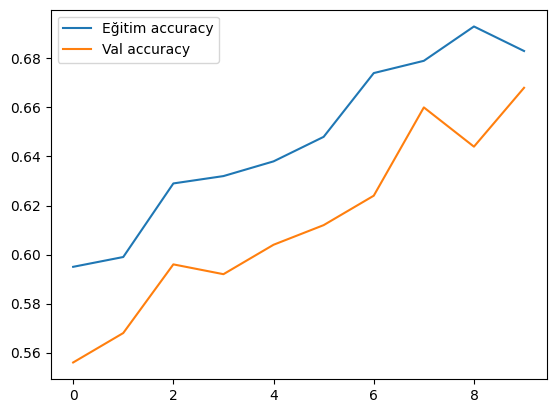

In [16]:
# Accuracy
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

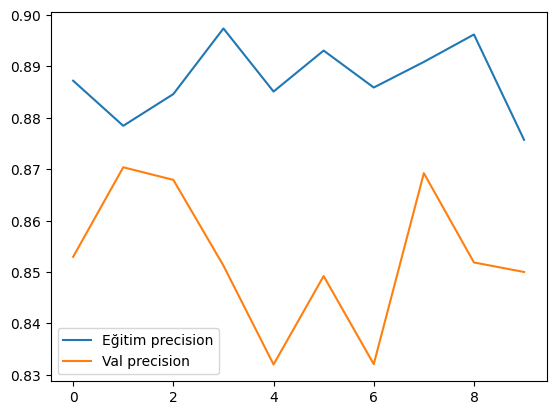

In [17]:
# Precision
plt.figure()
plt.plot(hist.history["precision"], label="Eğitim precision")
plt.plot(hist.history["val_precision"], label="Val precision")
plt.legend()
plt.show()

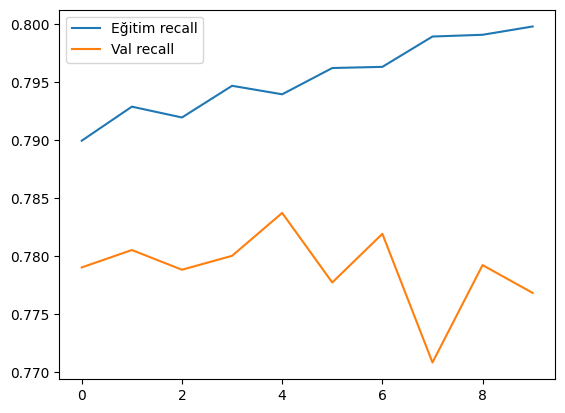

In [ ]:
# Recall
plt.plot(hist.history["recall"], label="Eğitim recall")
plt.plot(hist.history["val_recall"], label="Val recall")
plt.legend()
plt.show()

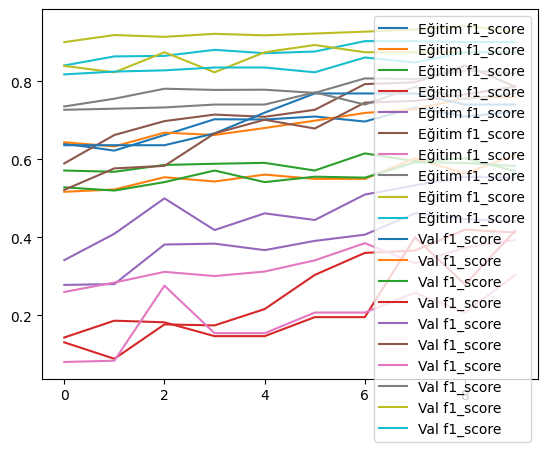

In [19]:
# F1
plt.plot(hist.history["f1_score"], label="Eğitim f1_score")
plt.plot(hist.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()

In [20]:
### BAŞARIYI ARTIRMA
# katman sayısını ve nöron sayısını artırma ve düzenliştirme
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Modelin özetini yazdırarak katmanların detaylarını görselleştirir.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [21]:
# Optimizer seçimi ve learning rate
# Modelin derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Epoch sayısını artırma
# Modelin eğitimi
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
32/32 [==============================] - 1s 10ms/step - loss: 1.6481 - accuracy: 0.3990 - val_loss: 1.0833 - val_accuracy: 0.5480
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 1.1156 - accuracy: 0.6140 - val_loss: 0.7880 - val_accuracy: 0.7160
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.9053 - accuracy: 0.6820 - val_loss: 0.7037 - val_accuracy: 0.7440
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.8045 - accuracy: 0.7180 - val_loss: 0.6387 - val_accuracy: 0.7480
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7307 - accuracy: 0.7500 - val_loss: 0.6078 - val_accuracy: 0.7880
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.7540 - val_loss: 0.5709 - val_accuracy: 0.8000
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.7590 - val_loss: 0.5513 - val_accuracy: 0.8080
Epoch 8/20
32/32 [=

In [23]:
# Test verisi üzerinde modelin performansını değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

8/8 - 0s - loss: 0.5046 - accuracy: 0.8320 - 30ms/epoch - 4ms/step
Test loss: 0.5046
Test accuracy: 0.8320


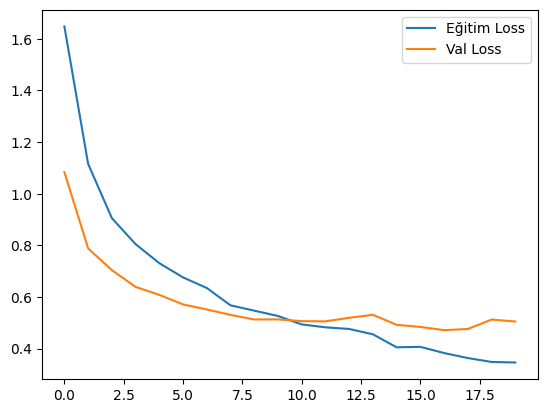

In [24]:
plt.figure()
# Eğitim kayıplarını çizme
plt.plot(history.history["loss"], label="Eğitim Loss")
# Doğrulama kayıplarını çizme
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

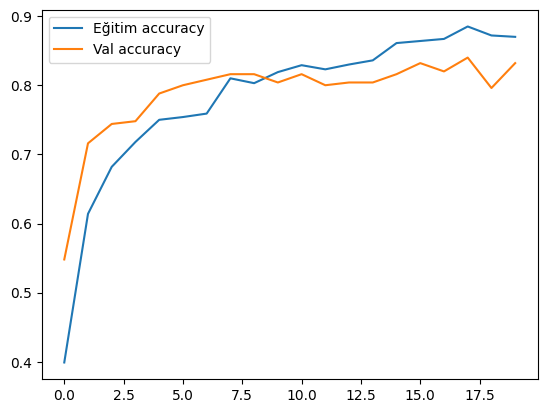

In [25]:
plt.figure()
# Eğitim doğruluğunu çizme
plt.plot(history.history["accuracy"], label="Eğitim accuracy")
# Doğrulama doğruluğunu çizme
plt.plot(history.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

## 6. Evrişimli Sinir Ağları(CNN) ile Model Eğitimi

In [6]:
# CNN Modeli Oluşturalım
from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout


In [7]:
model = tf.keras.Sequential([
    # Giriş katmanı: 28x28 boyutunda tek kanallı (gri tonlamalı) görüntüler için giriş
    tf.keras.layers.InputLayer((28,28,1)),

    # Yeniden ölçekleme katmanı: Piksel değerlerini 0-1 aralığına ölçekler
    tf.keras.layers.Rescaling(1/255.0),

    # İlk evrişim katmanı: 8 filtre ve 3x3 çekirdek boyutu, ReLU aktivasyonu
    Conv2D(8, 3, activation="relu"),

    # İlk havuzlama katmanı: 2x2 boyutunda maksimum havuzlama
    MaxPooling2D((2, 2)),

    # İkinci evrişim katmanı: 16 filtre ve 3x3 çekirdek boyutu, ReLU aktivasyonu
    Conv2D(16, 3, activation="relu"),

    # İkinci havuzlama katmanı: 2x2 boyutunda maksimum havuzlama
    MaxPooling2D((2, 2)),

    # Düzleştirme katmanı: 2D özellik haritalarını 1D vektöre dönüştürür
    Flatten(),

    # Tam bağlantılı katman: 10 nöron ve softmax aktivasyonu (10 sınıf için)
    Dense(10, activation="softmax")
])

# Modelin özetini yazdırır: katmanların detaylarını ve toplam parametre sayısını gösterir
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0

In [8]:
# Modelin derlenmesi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall','F1Score'])

In [9]:
# Modeli eğitme
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
32/32 [==============================] - 4s 55ms/step - loss: 2.3022 - accuracy: 0.1080 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0475 - val_loss: 2.3027 - val_accuracy: 0.0760 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0141
Epoch 2/10
32/32 [==============================] - 1s 23ms/step - loss: 2.2997 - accuracy: 0.1200 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0214 - val_loss: 2.3025 - val_accuracy: 0.0760 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0141
Epoch 3/10
32/32 [==============================] - 1s 26ms/step - loss: 2.2948 - accuracy: 0.1610 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0542 - val_loss: 2.3017 - val_accuracy: 0.0760 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0141
Epoch 4/10
32/32 [==============================] - 1s 31ms/step - loss: 2.2854 - accuracy: 0.1430 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0

In [10]:
model.evaluate(X_test, y_test, verbose=2)

8/8 - 0s - loss: 1.3465 - accuracy: 0.6000 - precision: 0.9057 - recall: 0.1920 - f1_score: 0.5746 - 87ms/epoch - 11ms/step


[1.346455693244934,
 0.6000000238418579,
 0.9056603908538818,
 0.19200000166893005,
 array([0.75      , 0.71875   , 0.14814816, 0.43999997, 0.4489796 ,
        0.6       , 0.22727275, 0.8235294 , 0.71794873, 0.87096775],
       dtype=float32)]

In [11]:
# Test verisi üzerinde modelin performansını değerlendirme
test_loss, test_accuracy, test_precision, test_recall, test_f1 = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')
print(f'Weighted average F1 score: {np.mean(test_f1):.4f}')

8/8 - 0s - loss: 1.3465 - accuracy: 0.6000 - precision: 0.9057 - recall: 0.1920 - f1_score: 0.5746 - 119ms/epoch - 15ms/step
Test loss: 1.3465
Test accuracy: 0.6000
Test precision: 0.9057
Test recall: 0.1920
Weighted average F1 score: 0.5746


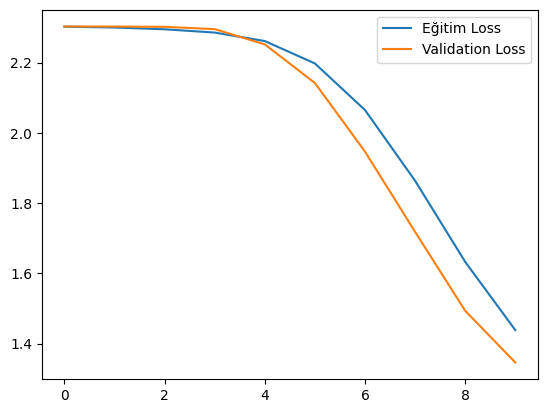

In [12]:
# Loss grafiği
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

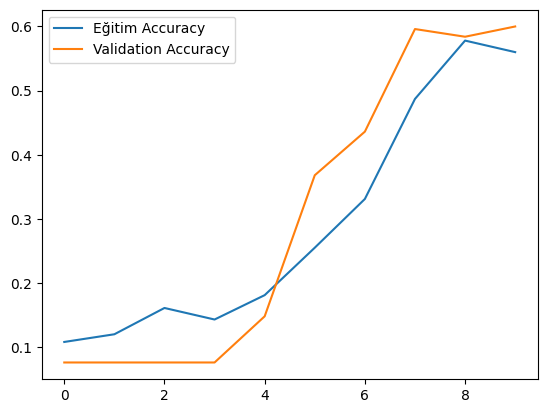

In [13]:
# Accuracy grafiği
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

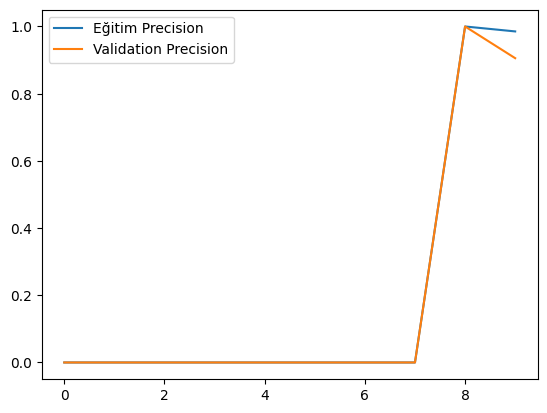

In [14]:
# Precision grafiği
plt.figure()
plt.plot(hist.history["precision"], label="Eğitim Precision")
plt.plot(hist.history["val_precision"], label="Validation Precision")
plt.legend()
plt.show()

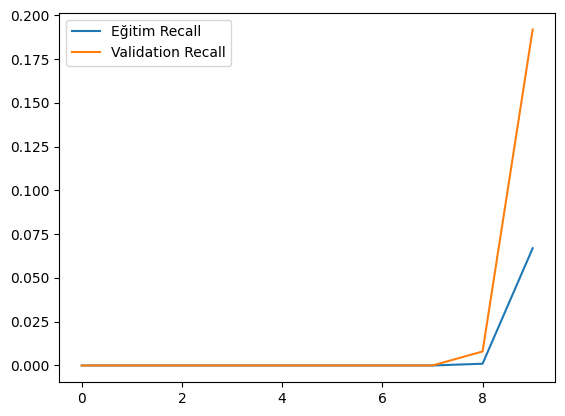

In [15]:
# Recall
plt.figure()
plt.plot(hist.history["recall"], label="Eğitim Recall")
plt.plot(hist.history["val_recall"], label="Validation Recall")
plt.legend()
plt.show()

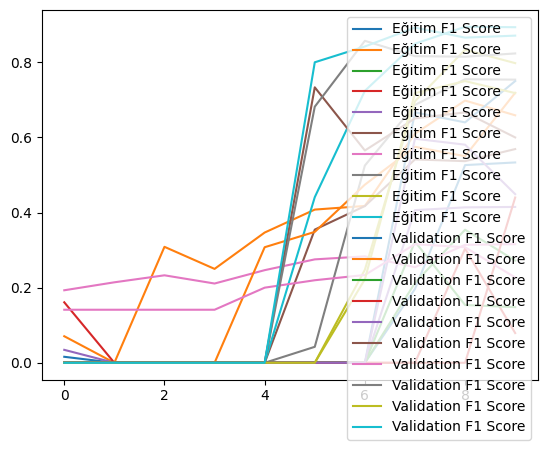

In [16]:
# F1 score
plt.figure()
plt.plot(hist.history["f1_score"], label="Eğitim F1 Score")
plt.plot(hist.history["val_f1_score"], label="Validation F1 Score")
plt.legend()
plt.show()

In [17]:
### BAŞARIYI ARTIRMA ###
# Conv2D katmanları ve MaxPooling2D katmanları sayısı artırıldı,
# Dense katmanlarındaki nöron sayıları ve aktivasyon fonksiyonları değiştirildi
# Modeli tanımlama
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Rescaling(1./255),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [18]:
# Optimizer ve learning rate seçimi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Modeli derleme (compile)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])


In [19]:
# Epoch sayısını artırma
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
32/32 [==============================] - 3s 63ms/step - loss: 2.3021 - accuracy: 0.1100 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0306 - val_loss: 2.3042 - val_accuracy: 0.0960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0175
Epoch 2/20
32/32 [==============================] - 1s 28ms/step - loss: 2.2940 - accuracy: 0.1170 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0209 - val_loss: 2.2904 - val_accuracy: 0.0960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0175
Epoch 3/20
32/32 [==============================] - 1s 25ms/step - loss: 2.2434 - accuracy: 0.1490 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0474 - val_loss: 2.1584 - val_accuracy: 0.1520 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0908
Epoch 4/20
32/32 [==============================] - 1s 27ms/step - loss: 1.9750 - accuracy: 0.3570 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0

In [20]:
# Modelin değerlendirilmesi
test_loss, test_accuracy, test_precision, test_recall, test_f1 = model.evaluate(X_test, y_test, verbose=2)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')
print(f'Weighted average F1 score: {np.mean(test_f1):.4f}')

8/8 - 0s - loss: 0.7180 - accuracy: 0.7120 - precision: 0.8715 - recall: 0.6240 - f1_score: 0.7008 - 78ms/epoch - 10ms/step
Test loss: 0.7180
Test accuracy: 0.7120
Test precision: 0.8715
Test recall: 0.6240
Weighted average F1 score: 0.7008


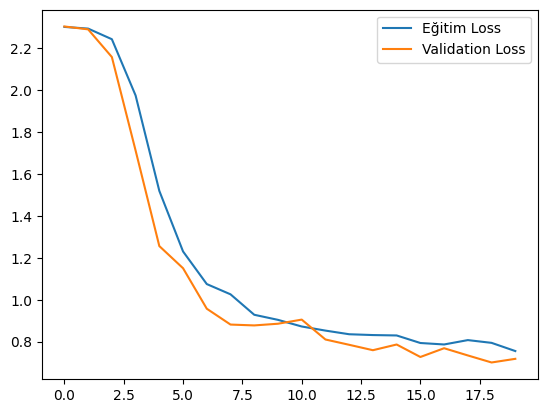

In [21]:
# Loss grafiği
plt.figure()
plt.plot(history.history["loss"], label="Eğitim Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

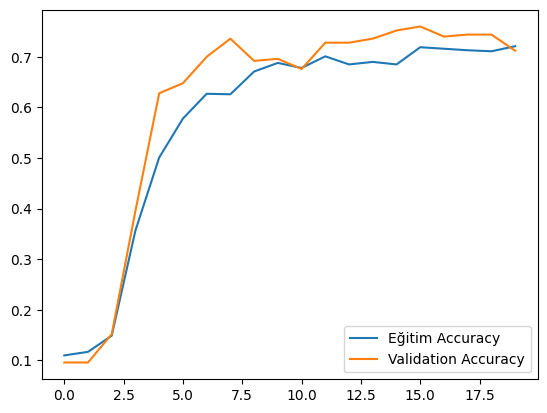

In [22]:
# Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Eğitim Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

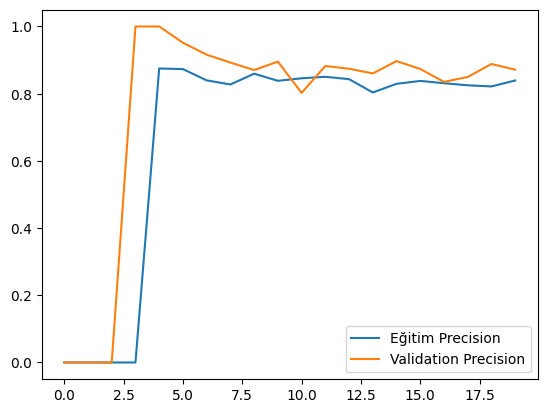

In [24]:
# Precision
plt.figure()
plt.plot(history.history["precision"], label="Eğitim Precision")
plt.plot(history.history["val_precision"], label="Validation Precision")
plt.legend()
plt.show()

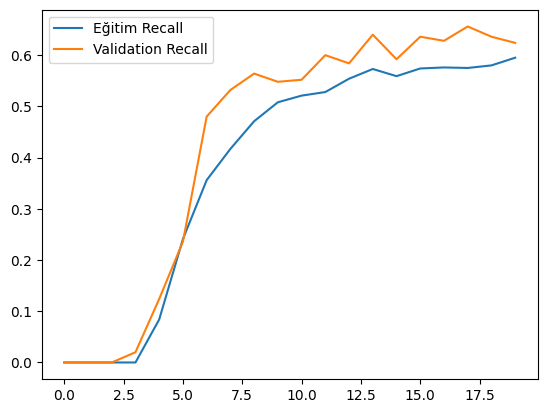

In [25]:
# Recall
plt.figure()
plt.plot(history.history["recall"], label="Eğitim Recall")
plt.plot(history.history["val_recall"], label="Validation Recall")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

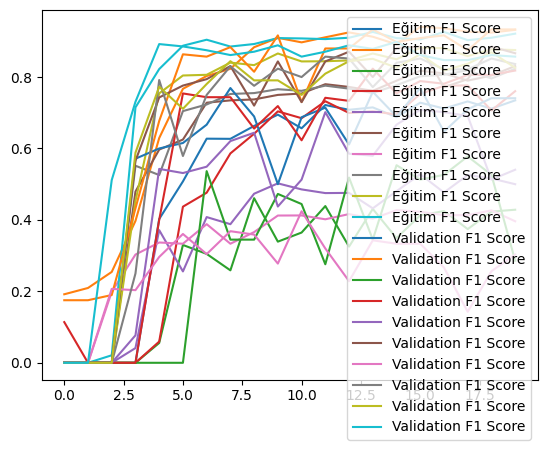

In [26]:
# F1
plt.figure()
plt.plot(history.history["f1_score"], label="Eğitim F1 Score")
plt.plot(history.history["val_f1_score"], label="Validation F1 Score")
plt.legend()
plt.show